In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

C:\Users\SHUBHAM\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\SHUBHAM\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


<h1 style="color:Red">
    Model 1 :<br>
    Regression of FDI and GDP
</h1>

data:
fdi = signum(fdi)*ln(abs(fdi))

In [274]:
rnd_fdi = pd.read_excel("./wholesome.xlsx","FDI vs RnD")
# rnd_fdi = rnd_fdi[["Time","GDP (current US$)","Foreign direct investment, net inflows (BoP, current US$)","RND (percent of gdp)"]]
rnd_fdi = rnd_fdi.iloc[:21,1:6]
rnd_fdi.head()

,GDP (current US$),"Foreign direct investment, net inflows (BoP, current US$)",RND (percent of gdp),"fdi (inwards) (million eur,2020)",ln(fdi inwards)
0,25.557217,23.326109,3.24,26085,10.169116
1,25.586337,21.894109,3.19,27312,10.215081
2,25.663038,22.814460,3.25,32409,10.386191
3,25.866532,22.509237,3.30,39791,10.591396
4,26.007063,22.636815,3.31,42183,10.649773


In [280]:
temp = pd.read_excel("./wholesome.xlsx","FDI vs RnD")
# rnd_fdi = rnd_fdi[["Time","GDP (current US$)","Foreign direct investment, net inflows (BoP, current US$)","RND (percent of gdp)"]]
temp = temp.iloc[:21,:6]
print("       Table 4a: Data for FDI and GERD (percent of GDP)")
temp[["Time","RND (percent of gdp)","fdi (inwards) (million eur,2020)"]]

       Table 4a: Data for FDI and GERD (percent of GDP)


,Time,RND (percent of gdp),"fdi (inwards) (million eur,2020)"
0,2000,3.240000,26085
1,2001,3.190000,27312
2,2002,3.250000,32409
3,2003,3.300000,39791
4,2004,3.310000,42183
5,2005,3.320000,46533
6,2006,3.330000,53702
7,2007,3.340000,62458
8,2008,3.540000,60355
9,2009,3.730000,59449


In [281]:
print("Table 4b: Summary of dataset")
rnd_fdi.describe()

Table 4b: Summary of dataset


,GDP (current US$),"Foreign direct investment, net inflows (BoP, current US$)",RND (percent of gdp),"fdi (inwards) (million eur,2020)",ln(fdi inwards)
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,26.137151,12.178998,3.182284,58960.904762,10.935154
std,0.257912,19.862362,0.362031,16832.453318,0.343566
min,25.557217,-23.081446,2.488565,26085.000000,10.169116
25%,26.045344,21.894109,2.870000,46533.000000,10.747917
50%,26.254663,22.636815,3.270000,62945.000000,11.050017
75%,26.320186,23.471284,3.340000,73758.000000,11.208545
max,26.374189,23.813369,3.730000,76643.000000,11.246914


In [247]:
print([i for i in range(2000,2005,1)])

[2000, 2001, 2002, 2003, 2004]


In [248]:
X = rnd_fdi.iloc[:,2].array
y = rnd_fdi.iloc[:,3].array
time = np.array([i for i in range(2000,2021)], dtype=np.int_)
time

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

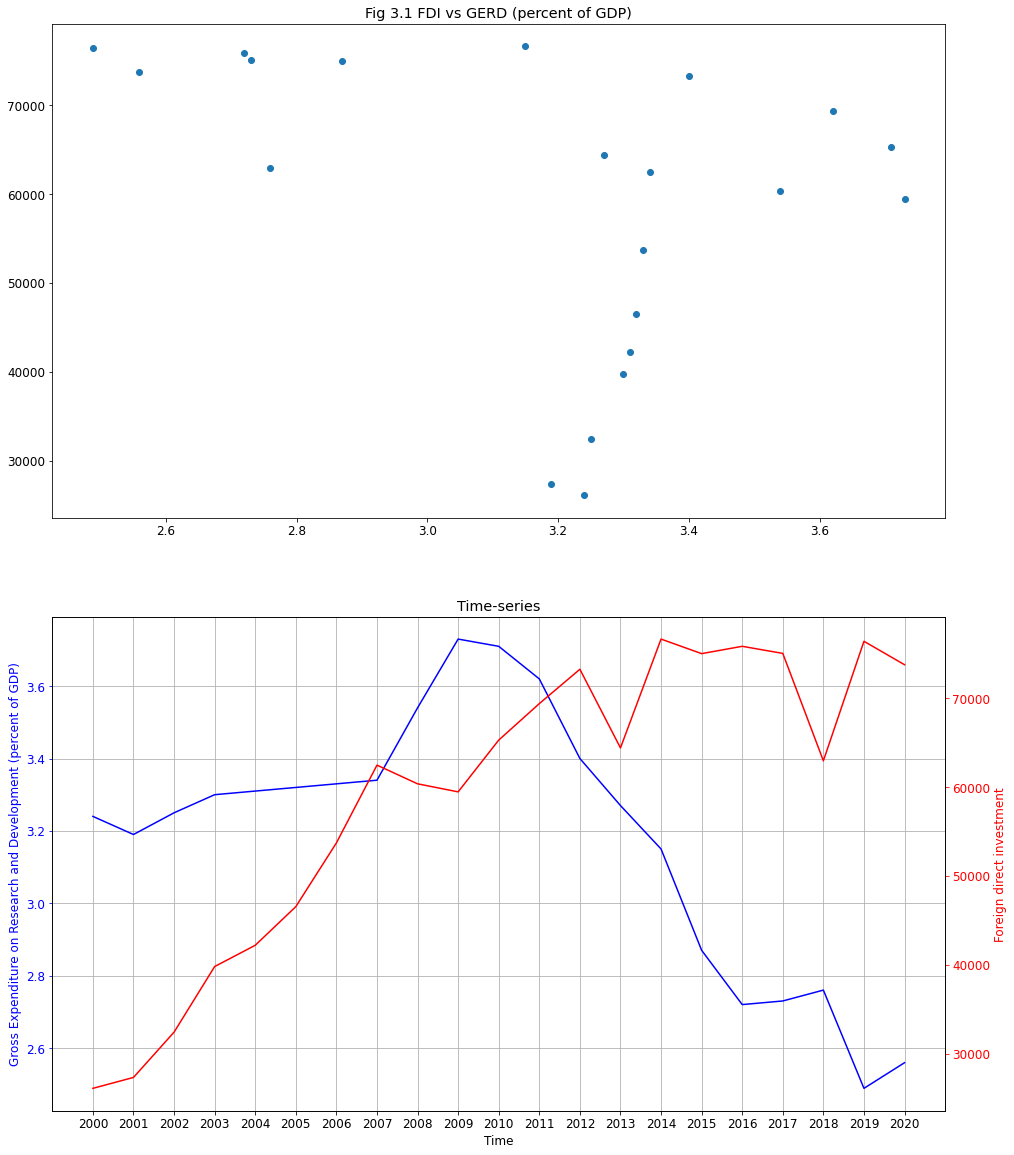

In [266]:
plt.rcParams["figure.figsize"] = (16,20)
plt.rcParams.update({'font.size': 12})
fig, (ax1,ax2)= plt.subplots(2)
ax3 = ax2.twinx()

ax1.scatter(X,y)
ax2.plot(time,X, color="blue", label="GERD")
ax3.plot(time,y, color="red", label="FDI")

ax1.set_title("Fig 3.1 FDI vs GERD (percent of GDP)")
ax2.set_title("Time-series")
ax2.set_xticks(np.arange(2000,2021,1))
ax2.set_xlabel("Time")
ax2.set_ylabel("Gross Expenditure on Research and Development (percent of GDP)", color="blue")
ax2.tick_params(axis='y', color='blue', labelcolor='blue')
ax3.set_ylabel("Foreign direct investment", color="red")
ax3.tick_params(axis='y', color='red', labelcolor='red')
ax2.grid()

plt.savefig("./plots/fdi_gdp", dpi=600, facecolor='w', edgecolor='w', orientation='portrait', format=None, transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

plt.show()

<p style="color:white">linear fit</p>

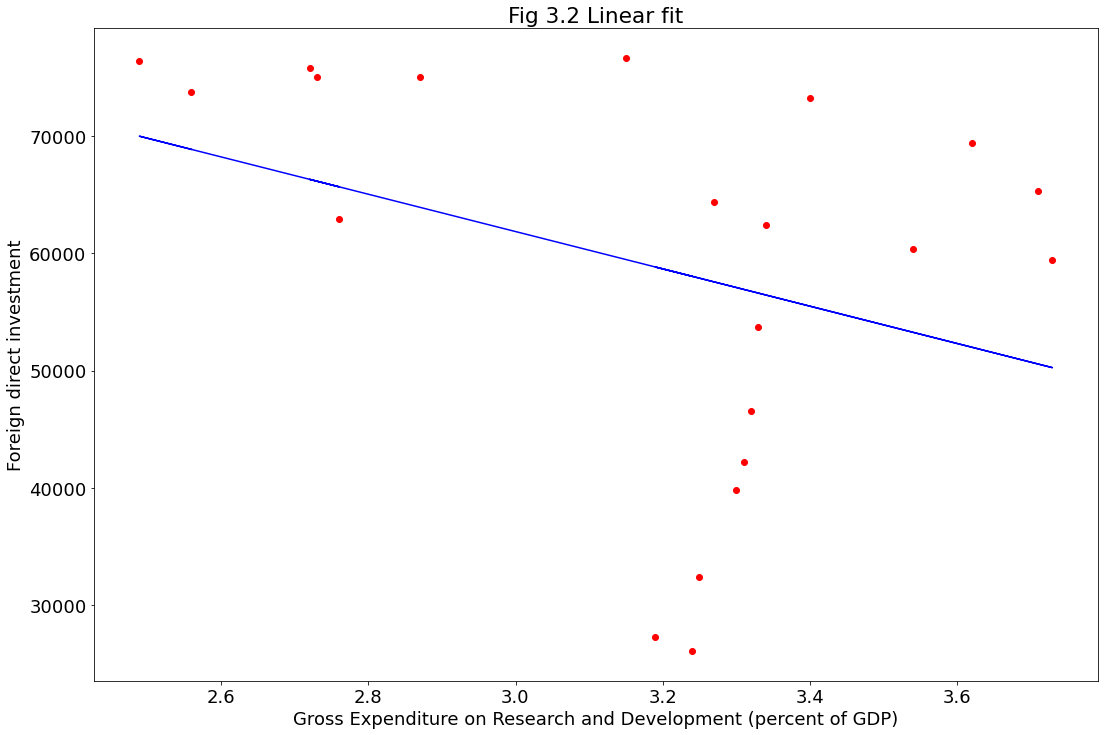

0.11690072591052891
109549.16163110561
[-15896.83989989]


In [267]:
lin_reg = LinearRegression().fit(X.reshape([-1,1]),y)
plt.rcParams["figure.figsize"] = (18,12)
plt.rcParams.update({'font.size': 18})
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X.reshape([-1,1])),color='blue')
plt.title("Fig 3.2 Linear fit")
plt.xlabel("Gross Expenditure on Research and Development (percent of GDP)")
plt.ylabel("Foreign direct investment")

plt.savefig("./plots/fdi_gdp_lin_fit", dpi=600, facecolor='w', edgecolor='w', orientation='portrait', format=None, transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

plt.show()

print(lin_reg.score(X.reshape([-1,1]),y))
print(lin_reg.intercept_)
print(lin_reg.coef_)

<p style="color:white">Polynomial fit</p>

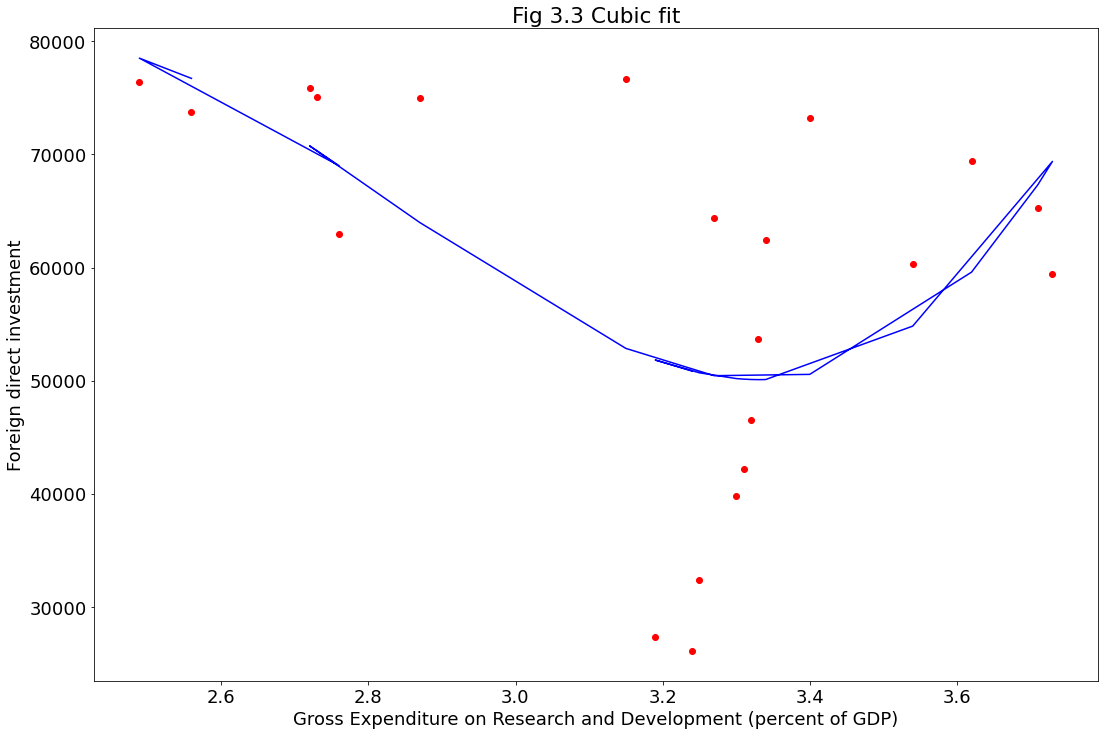

0.36073649920349404
-1325074.1842382448
[      0.         1556351.34753418 -562601.81581137   65838.32011507]


In [268]:
poly_reg=PolynomialFeatures(degree=3)
X_poly=poly_reg.fit_transform(X.reshape([-1,1]))
poly_reg.fit(X_poly,y)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y)

X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.rcParams.update({'font.size': 18})
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X.reshape([-1,1]))),color='blue')
plt.title("Fig 3.3 Cubic fit")
plt.xlabel("Gross Expenditure on Research and Development (percent of GDP)")
plt.ylabel("Foreign direct investment")

plt.savefig("./plots/fdi_gdp_cube_fit", dpi=600, facecolor='w', edgecolor='w', orientation='portrait', format=None, transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

plt.show()

print(lin_reg2.score(X_poly,y))
print(lin_reg2.intercept_)
print(lin_reg2.coef_)



In [222]:
x = np.array(X.reshape([-1,1]))
ynew = np.array(y)

x = sm.add_constant(x)
results = sm.OLS(ynew, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     2.515
Date:                Sun, 01 May 2022   Prob (F-statistic):              0.129
Time:                        07:04:47   Log-Likelihood:                -232.33
No. Observations:                  21   AIC:                             468.7
Df Residuals:                      19   BIC:                             470.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.095e+05   3.21e+04      3.413      0.0

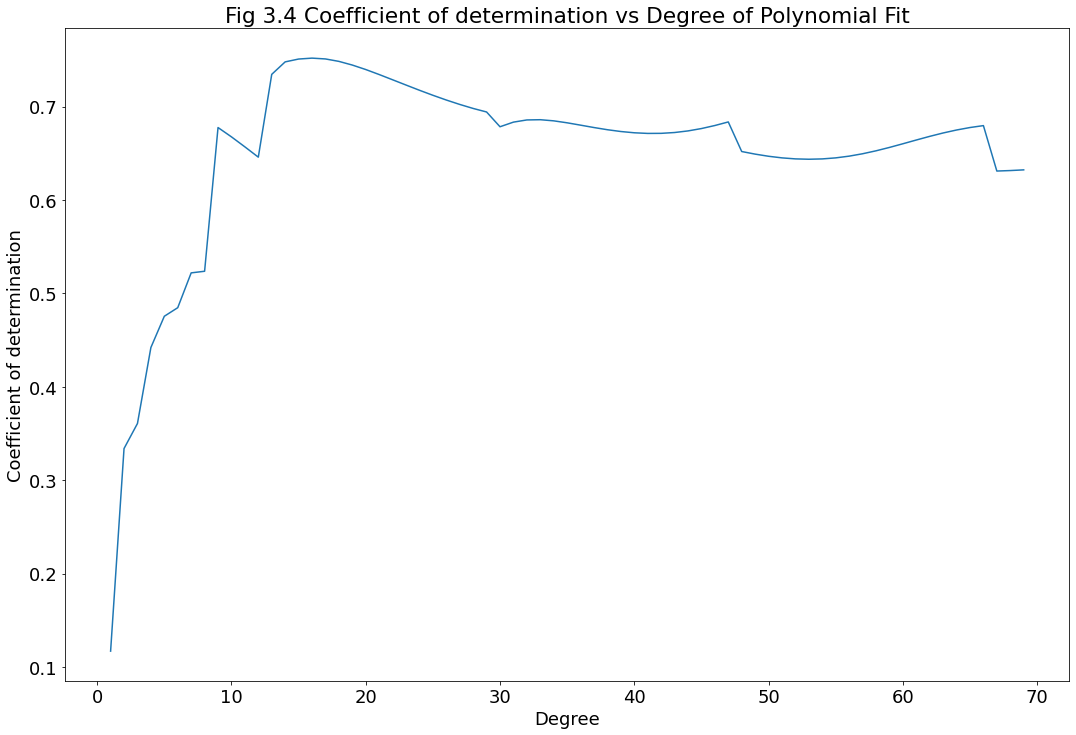

In [269]:
r_sq = []
tt = 70
for i in range(1,tt):
    poly_reg=PolynomialFeatures(degree=i)
    X_poly=poly_reg.fit_transform(X.reshape([-1,1]))
    poly_reg.fit(X_poly,y)
    lin_reg2=LinearRegression()
    lin_reg2.fit(X_poly,y)

    r_sq = np.append(r_sq,lin_reg2.score(X_poly,y))

# X_grid=np.arange(min(X),max(X),0.1)
# X_grid=X_grid.reshape((len(X_grid),1))
# plt.scatter(X,y,color='red')
# plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X.reshape([-1,1]))),color='blue')
# plt.title("Cubic fit")
# plt.xlabel("Gross Expenditure on Research and Development (percent of GDP)")
# plt.ylabel("Foreign direct investment")
# plt.show()

# print(lin_reg2.score(X_poly,y))
# print(lin_reg2.intercept_)
# print(lin_reg2.coef_)

plt.rcParams.update({'font.size': 18})
plt.plot(np.arange(1,tt),r_sq)
plt.title("Fig 3.4 Coefficient of determination vs Degree of Polynomial Fit")
plt.xlabel("Degree")
plt.ylabel("Coefficient of determination")

plt.savefig("./plots/r_sq", dpi=600, facecolor='w', edgecolor='w', orientation='portrait', format=None, transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

plt.show()

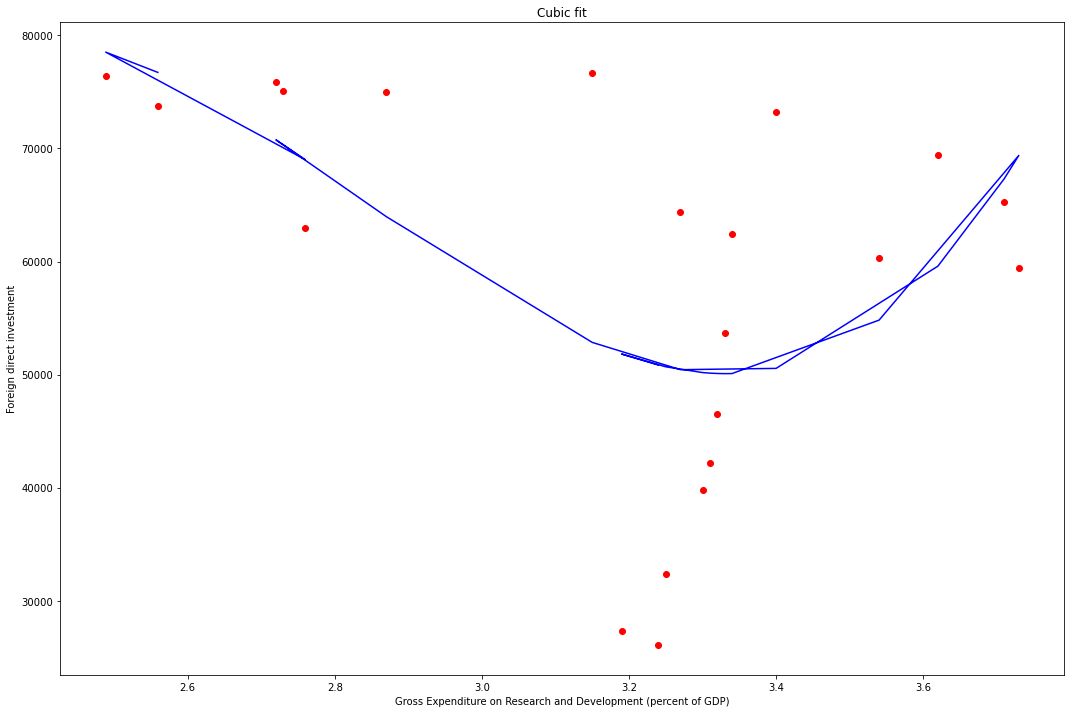

In [235]:
poly_reg=PolynomialFeatures(degree=3)
X_poly=poly_reg.fit_transform(X.reshape([-1,1]))
poly_reg.fit(X_poly,y)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y)
r_sq = np.append(r_sq,lin_reg2.score(X_poly,y))

X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X.reshape([-1,1]))),color='blue')
plt.title("Cubic fit")
plt.xlabel("Gross Expenditure on Research and Development (percent of GDP)")
plt.ylabel("Foreign direct investment")
plt.show()

# print(lin_reg2.score(X_poly,y))
# print(lin_reg2.intercept_)
# print(lin_reg2.coef_)



In [243]:
x = np.array(X_poly)
ynew = np.array(y)

x = sm.add_constant(x)
results = sm.OLS(ynew, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     3.198
Date:                Sun, 01 May 2022   Prob (F-statistic):             0.0500
Time:                        07:19:56   Log-Likelihood:                -228.94
No. Observations:                  21   AIC:                             465.9
Df Residuals:                      17   BIC:                             470.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.325e+06   2.38e+06     -0.556      0.5

In [259]:
poly_reg=PolynomialFeatures(degree=16)
X_poly=poly_reg.fit_transform(X.reshape([-1,1]))
poly_reg.fit(X_poly,y)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y)
r_sq = np.append(r_sq,lin_reg2.score(X_poly,y))

print(lin_reg2.score(X_poly,y))
print(lin_reg2.intercept_,lin_reg2.coef_)

0.7520936980455858
46226416842.90476 [ 0.00000000e+00 -4.03430929e+09 -1.12966891e+10 -1.30985877e+10
 -7.58178943e+09  3.79450805e+09  1.13636676e+10  4.23539193e+09
 -1.03804690e+10 -4.97538737e+09  1.38674705e+10 -9.84375245e+09
  3.78409655e+09 -8.86456035e+08  1.27202619e+08 -1.03405184e+07
  3.66491363e+05]


<p style="color:white">
    max fiting degree 16
    <br>
    coeff : 
    [ 0.00000000e+00, -4.03430929e+09, -1.12966891e+10, -1.30985877e+10,
       -7.58178943e+09,  3.79450805e+09,  1.13636676e+10,  4.23539193e+09,
       -1.03804690e+10, -4.97538737e+09,  1.38674705e+10, -9.84375245e+09,
        3.78409655e+09, -8.86456035e+08,  1.27202619e+08, -1.03405184e+07,
        3.66491363e+05]
</p>

<h1 style="color:Red">
    Model 2 :<br>
    Sectoral fdi, gdp leading to growth
</h1>

In [129]:
columns = ["Sector","2013","2014","2015","2016","2017","2018","2019","2020"]

inward_fdi = pd.read_excel("./sectoral.xlsx","inward")
inward_fdi = inward_fdi.iloc[2:9,]
inward_fdi.columns = np.array(columns)
inward_fdi = inward_fdi.reset_index().drop(["index"],axis=1)

outward_fdi = pd.read_excel("./sectoral.xlsx","outward")
outward_fdi = outward_fdi.iloc[2:9,]
outward_fdi.columns = np.array(columns)
outward_fdi = outward_fdi.reset_index().drop(["index"],axis=1)
# outward_fdi
inward_fdi

,Sector,2013,2014,2015,2016,2017,2018,2019,2020
0,Total,64394,76643,75005,75830,75031,62945,76394,73758
1,"A Agriculture, forestry and fishing (01-03)",0,0,0,0,0,0,0,0
2,B Mining and quarrying (05-09),1751,1797,2256,1758,2002,2108,2235,2142
3,C Manufacturing (10-33),18155,24843,19952,22423,28376,22349,24258,22694
4,"E Water supply; sewerage, waste management and...",...,...,...,...,...,23,42,42
5,F Construction (41-43),408,398,672,626,750,735,1151,492
6,G-U Services (45-99),43012,48573,48187,49948,41471,35166,45285,44965


<h3 style="color:blue">
dropping <br>
E Water supply; sewerage, waste management and remediation activities (36-39) <br>
.....
</h3>

In [130]:
inward_fdi = inward_fdi.drop(4,axis=0)
inward_fdi

,Sector,2013,2014,2015,2016,2017,2018,2019,2020
0,Total,64394,76643,75005,75830,75031,62945,76394,73758
1,"A Agriculture, forestry and fishing (01-03)",0,0,0,0,0,0,0,0
2,B Mining and quarrying (05-09),1751,1797,2256,1758,2002,2108,2235,2142
3,C Manufacturing (10-33),18155,24843,19952,22423,28376,22349,24258,22694
5,F Construction (41-43),408,398,672,626,750,735,1151,492
6,G-U Services (45-99),43012,48573,48187,49948,41471,35166,45285,44965


In [131]:
inward_fdi = inward_fdi.reset_index().drop(["index","2013","2014"],axis=1)
inward_fdi

,Sector,2015,2016,2017,2018,2019,2020
0,Total,75005,75830,75031,62945,76394,73758
1,"A Agriculture, forestry and fishing (01-03)",0,0,0,0,0,0
2,B Mining and quarrying (05-09),2256,1758,2002,2108,2235,2142
3,C Manufacturing (10-33),19952,22423,28376,22349,24258,22694
4,F Construction (41-43),672,626,750,735,1151,492
5,G-U Services (45-99),48187,49948,41471,35166,45285,44965


In [132]:
outward_fdi = outward_fdi.drop(4,axis=0)
outward_fdi


,Sector,2013,2014,2015,2016,2017,2018,2019,2020
0,Total,105469,96159,86900,103350,104149,112534,130381,117075
1,"A Agriculture, forestry and fishing (01-03)",0,0,0,0,0,0,0,0
2,B Mining and quarrying (05-09),0,482,464,414,382,511,494,432
3,C Manufacturing (10-33),51834,47511,37186,54229,54135,54511,57068,52088
5,F Construction (41-43),1919,923,385,306,268,871,1766,320
6,G-U Services (45-99),34372,31079,35775,35039,34304,38964,38797,42319


In [133]:
outward_fdi = outward_fdi.reset_index().drop(["index","2013","2014"],axis=1)
outward_fdi

,Sector,2015,2016,2017,2018,2019,2020
0,Total,86900,103350,104149,112534,130381,117075
1,"A Agriculture, forestry and fishing (01-03)",0,0,0,0,0,0
2,B Mining and quarrying (05-09),464,414,382,511,494,432
3,C Manufacturing (10-33),37186,54229,54135,54511,57068,52088
4,F Construction (41-43),385,306,268,871,1766,320
5,G-U Services (45-99),35775,35039,34304,38964,38797,42319


In [297]:
sector_gdp = pd.read_excel("./sectoral.xlsx","Sectoral GDP")
sector_gdp = sector_gdp.drop(["Transaction","Year"],axis=1)
sector_gdp = sector_gdp[sector_gdp["Sector"] != "-"]
sector_gdp = sector_gdp.reset_index().drop(["index"],axis=1)
sector_gdp = sector_gdp.iloc[:,:-1]
sector_gdp

,Sector,2015,2016,2017,2018,2019,2020
0,Total,211385,217518,226301,233468,239852,237995
1,"A Agriculture, forestry and fishing (01-03)",4764,5026,5241,5572,5635,5829
2,B Mining and quarrying (05-09),37366,37991,41205,41047,41903,41316
3,C Manufacturing (10-33),31041,31683,34400,34072,34569,33933
4,F Construction (41-43),11899,13120,14014,14975,15371,15882
5,G-U Services (45-99),128570,131257,135247,139720,144376,143067


In [307]:
sector_gdp.iloc[0,:].values[1:]

array([211385, 217518, 226301, 233468, 239852, 237995], dtype=object)

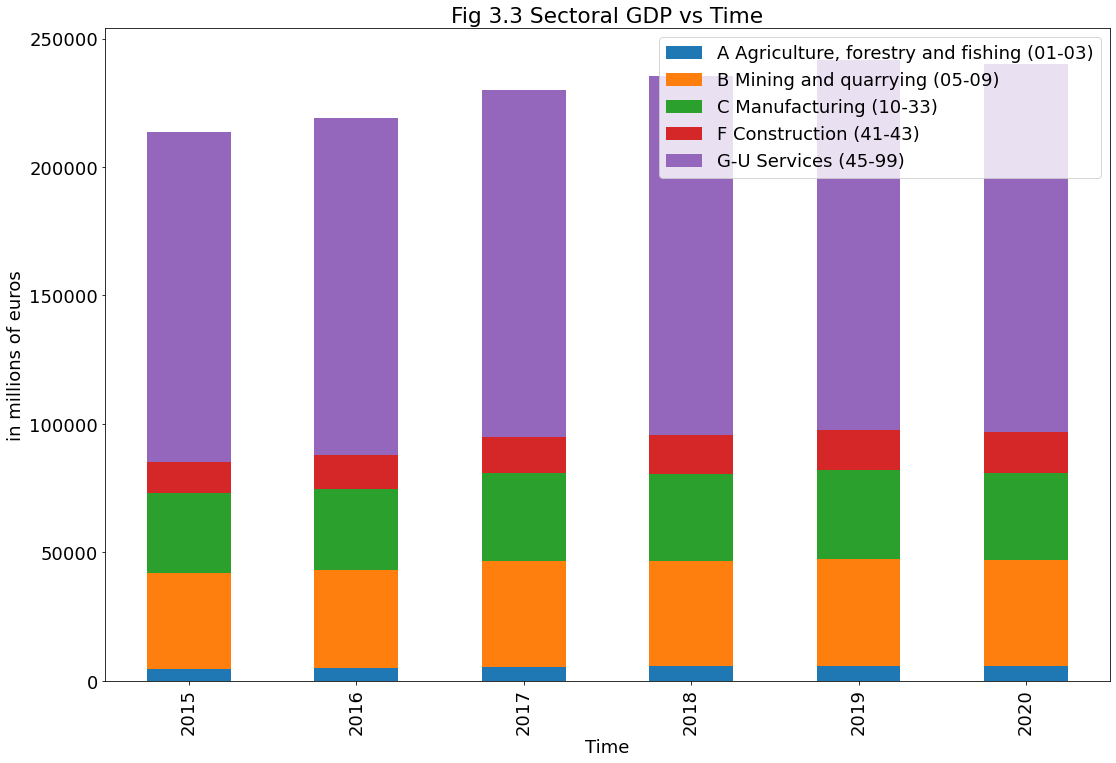

In [323]:
plotdata = sector_gdp
title = "Fig 3.3 Sectoral GDP vs Time"

plotdata = plotdata.iloc[1:,:]
plotdata = plotdata.set_index([plotdata["Sector"].values]).drop(["Sector"],axis=1)
plt.rcParams.update({'font.size': 18})
plotdata.transpose().plot(kind="bar",stacked=True).legend(loc="best")
plt.title(title)
plt.xlabel("Time")
plt.ylabel("in millions of euros")
plt.legend(loc="best")

plt.savefig("./plots/sectoral gdp", dpi=600, facecolor='w', edgecolor='w', orientation='portrait', format=None, transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)


plt.show()

In [211]:
capita_gdp = pd.read_excel("./sectoral.xlsx","gdp per capita")
capita_gdp = capita_gdp.iloc[:,1:]
capita_gdp = capita_gdp.iloc[0]
capita_gdp = np.array(capita_gdp)
capita_gdp

array([42801.9, 43814. , 46412.1, 49988.9, 48628.6, 48755.4])

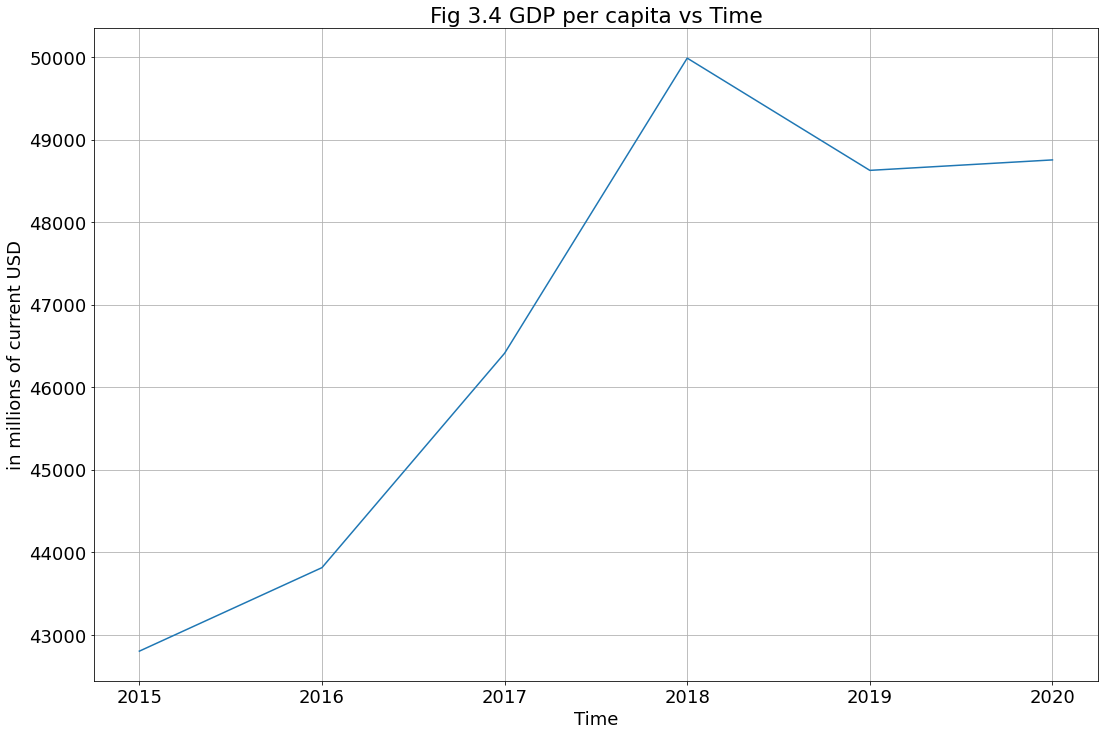

In [324]:
plt.rcParams.update({'font.size': 18})
plt.plot(np.array([2015,2016,2017,2018,2019,2020]),capita_gdp)
plt.title("Fig 3.4 GDP per capita vs Time")
plt.xlabel("Time")
plt.ylabel("in millions of current USD")
plt.grid()

plt.savefig("./plots/gpc", dpi=600, facecolor='w', edgecolor='w', orientation='portrait', format=None, transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)

plt.show()

In [168]:
rnd = pd.read_excel("wholesome.xlsx","source of funds")
rnd = rnd.iloc[0,2:][15:]
rnd

2015    543.1
2016    534.6
2017    577.7
2018    587.2
2019    602.6
2020    585.6
Name: 0, dtype: object

In [135]:
print(inward_fdi.shape,outward_fdi.shape,sector_gdp.shape)

(6, 7) (6, 7) (6, 7)


In [212]:
years = sector_gdp.columns[1:]

def column_maker(df):
    col = []

    for i in years:
        col = np.append(col,df[i])

    return col

def rep_col(df):
    col = []

    for i in range(0,6):
        for j in range(1,7):
            # print(i)
            col = np.append(col,df[i])

    return col

In [213]:
fdi_i = column_maker(inward_fdi)
fdi_o = column_maker(outward_fdi)
gdp_ = column_maker(sector_gdp)
time = rep_col([i for i in range(1,8)])
gpc = rep_col(capita_gdp)
rnd_ = rep_col(rnd)

print(len(fdi_i),len(fdi_o),len(gdp_),len(rnd),len(capita_gdp))

36 36 36 30 6


In [238]:
data = pd.DataFrame()
data["Year"] = (time+2014)
data["S_GDP"] = gdp_
data["S_FDI_I"] = fdi_i
data["S_FDI_O"] = fdi_o
data["RnD_T"] = rnd_ 
data["gdp per capita"] = gpc
data["Time"] = time.reshape([-1,1])

data.head()

,Year,S_GDP,S_FDI_I,S_FDI_O,RnD_T,gdp per capita,Time
0,2015.0,211385.0,75005,86900,543.1,42801.9,1.0
1,2015.0,4764.0,0,0,543.1,42801.9,1.0
2,2015.0,37366.0,2256,464,543.1,42801.9,1.0
3,2015.0,31041.0,19952,37186,543.1,42801.9,1.0
4,2015.0,11899.0,672,385,543.1,42801.9,1.0


In [239]:

def regress(data):
    X = data.iloc[:,2:]
    y = data.iloc[:,1]

    model = LinearRegression().fit(X, y)
    print(model.score(X,y),model.intercept_,model.coef_)


In [240]:
regress(data)

0.9305788787462608 102291.14251296138 [ 3.52301242e+00 -5.07183551e-01 -5.79962201e+02  5.02680713e+00
 -4.04983122e+03]


<p>
no log
0.9305788787462608 102291.14251296138 [ 3.52301242e+00 -5.07183551e-01 -5.79962201e+02  5.02680713e+00
 -4.04983122e+03]
</p>
<br>
<p>
log
0.793872616789094 10.295784002112553 [ 5.82351695e-05 -1.26142616e-05 -8.13916567e-03  8.33829501e-05
 -5.87673850e-02]
</p>

In [236]:
log_data = data
log_data["S_GDP"] = np.log(log_data["S_GDP"])
log_data.head()

,Year,S_GDP,S_FDI_I,S_FDI_O,RnD_T,gdp per capita,Time
0,2015.0,12.261436,75005,86900,543.1,42801.9,1.0
1,2015.0,8.468843,0,0,543.1,42801.9,1.0
2,2015.0,10.528516,2256,464,543.1,42801.9,1.0
3,2015.0,10.343064,19952,37186,543.1,42801.9,1.0
4,2015.0,9.384210,672,385,543.1,42801.9,1.0


In [237]:
regress(log_data)

0.793872616789094 10.295784002112553 [ 5.82351695e-05 -1.26142616e-05 -8.13916567e-03  8.33829501e-05
 -5.87673850e-02]


<h3 style="color:blue">
Using no log model
</h3>

In [244]:
x = np.array(X, dtype=float)
ynew = np.array(y)

x = sm.add_constant(x)
results = sm.OLS(ynew, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     80.43
Date:                Sun, 01 May 2022   Prob (F-statistic):           1.87e-16
Time:                        17:42:27   Log-Likelihood:                -409.70
No. Observations:                  36   AIC:                             831.4
Df Residuals:                      30   BIC:                             840.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.023e+05   1.06e+06      0.097      0.9

In [326]:
data.to_excel("./sectoral.xlsx","data")

In [329]:
inward_fdi.to_excel("./Blob data.xlsx","inward")

In [328]:
outward_fdi.to_excel("./Blob data.xlsx","outward")


In [330]:
sector_gdp.to_excel("./Blob data.xlsx","data")

In [333]:
data.head()

,Year,S_GDP,S_FDI_I,S_FDI_O,RnD_T,gdp per capita,Time
0,2015.0,211385.0,75005,86900,543.1,42801.9,1.0
1,2015.0,4764.0,0,0,543.1,42801.9,1.0
2,2015.0,37366.0,2256,464,543.1,42801.9,1.0
3,2015.0,31041.0,19952,37186,543.1,42801.9,1.0
4,2015.0,11899.0,672,385,543.1,42801.9,1.0


In [337]:
X = data.iloc[:,[2,3,5]]
y = data.iloc[:,1]

model = LinearRegression().fit(X,y)
print(model.score(X,y),model.intercept_,model.coef_)

0.9298180983180994 -130120.77600104042 [ 3.51909162 -0.50692113  2.97617261]


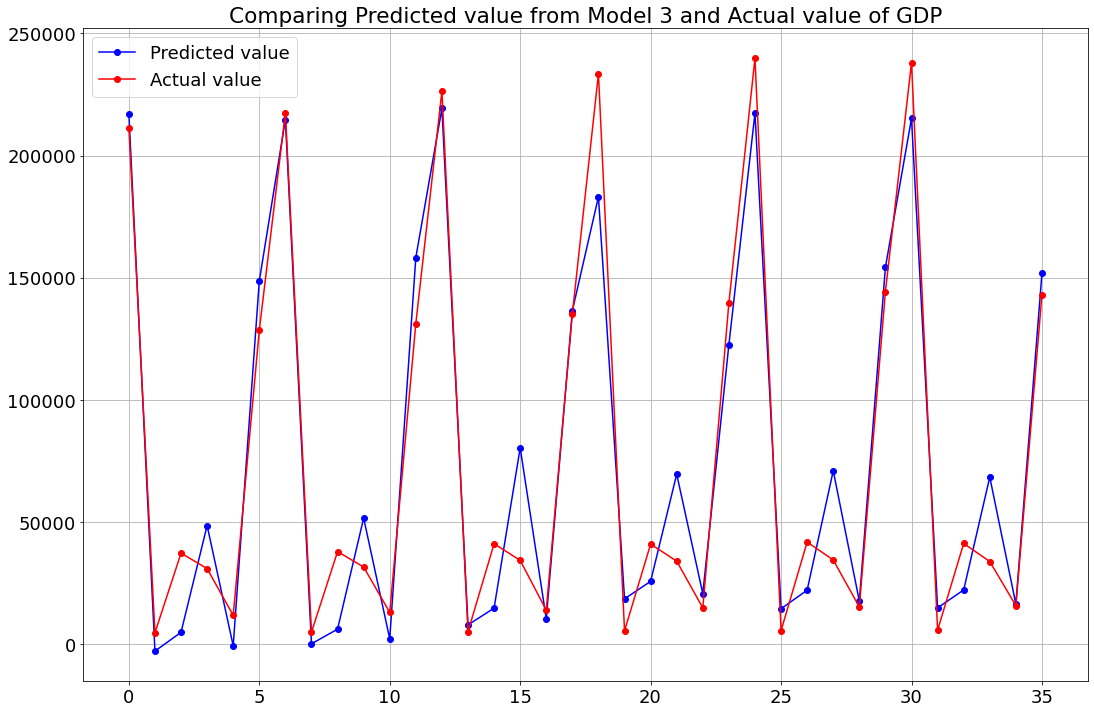

In [342]:
# model.predict(X)
plt.plot(model.predict(X), color="blue",marker="o", label="Predicted value")
plt.plot(y,color="red",marker="o",label="Actual value")
plt.title("Comparing Predicted value from Model 3 and Actual value of GDP")
plt.legend(loc="best")
plt.grid()

In [405]:
def predict(df,b):
    x = []
    for elem in df.iterrows():
        row = elem[1].values
        value = b[0] + b[1]*row[0]+ b[2]*row[1]+ b[3]*row[2]
        x = np.append(x,value)

    return x

def new_log(df):
    log = []

    for elem in df:
        if (elem > 0):
            val = np.log(elem)
        else:
            val = -1*np.log(np.abs(elem))
        log = np.append(log,val)

    return log

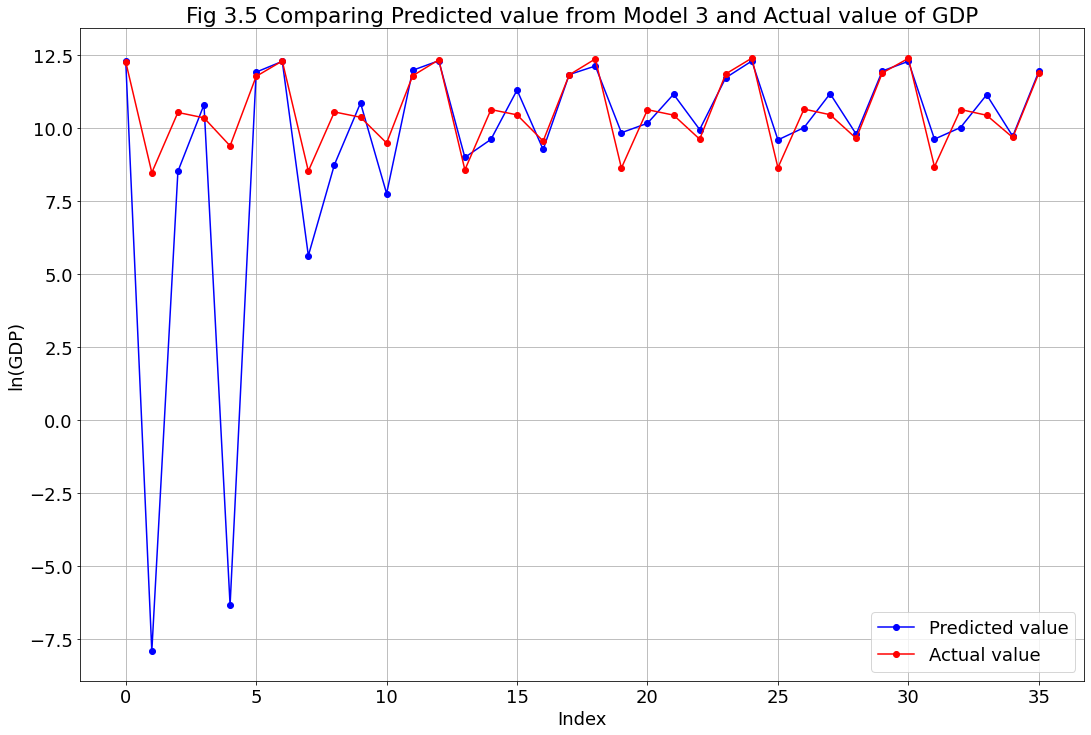

In [408]:
b = np.append(model.intercept_,model.coef_)
X_pred = predict(X,b)
plt.plot(new_log(X_pred), color="blue",marker="o", label="Predicted value")
plt.plot(new_log(y),color="red",marker="o",label="Actual value")
plt.title("Fig 3.5 Comparing Predicted value from Model 3 and Actual value of GDP")
plt.xlabel("Index")
plt.ylabel("ln(GDP)")
plt.legend(loc="best")
plt.grid()

plt.savefig("./plots/model2 fit", dpi=600, facecolor='w', edgecolor='w', orientation='portrait', format=None, transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)

plt.show()

In [402]:
type(X_pred)

numpy.ndarray

In [351]:
np.append(model.intercept_,model.coef_)

array([-1.30120776e+05,  3.51909162e+00, -5.06921126e-01,  2.97617261e+00])

In [392]:
i = 0
for elem in X.iterrows():
    row = elem[1].values
    print(row[0])

75005
0
2256
19952
672
48187
75830
0
1758
22423
626
49948
75031
0
2002
28376
750
41471
62945
0
2108
22349
735
35166
76394
0
2235
24258
1151
45285
73758
0
2142
22694
492
44965
